Initiate Loading


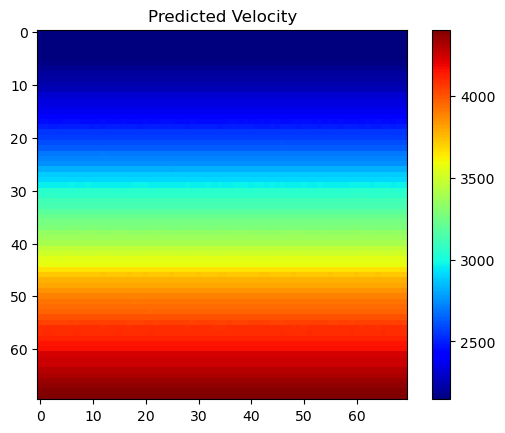

In [13]:
print("Initiate Loading")
from sklearn.decomposition import PCA 
from sklearn import preprocessing 
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, TensorDataset
from torchmetrics.functional import mean_absolute_error, mean_squared_error, structural_similarity_index_measure 
from PCA import PCASeismic  
from Model import MLP



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")        

the_folder="PCAS"

X_train = np.load(f'{the_folder}/train_X.npy') 
Y_train = np.load(f'{the_folder}/train_Y.npy') 

activation_func=nn.LeakyReLU()
model_loaded = MLP(X_train.shape[1], [2**11, 2**9, 2**7], Y_train.shape[1], activation_func, nn.Linear, 0.05).to(device)
model_loaded.load_state_dict(torch.load(f'{the_folder}/pca_model.pth', map_location=device))
model_loaded.eval()


the_x_data=np.load(f'{the_folder}/VISUALIZATION.npy')

# 1. Convert input to torch tensor and send to device
x_tensor = torch.from_numpy(the_x_data).float().to(device)

# 2. Get prediction from model
with torch.no_grad():
    y_pred = model_loaded(x_tensor)

# 3. Convert prediction back to numpy
y_pred_np = y_pred.cpu().numpy()

# 4. Reshape it to image shape (assuming you know the height & width)
# If your velocity image is, say, (64, 64)
first_image = y_pred_np[0].reshape(70,70)

# 5. Show it
plt.imshow(first_image, cmap='jet')
plt.title("Predicted Velocity")
plt.colorbar()
plt.show()